# Air Quality Prediction in Italy (2004 - 2005)
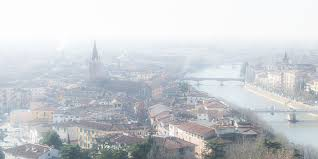


Air quality evaluation is an important way to monitor and control air pollution. The characteristics of air supply affect
its suitability for a specific use. A few air pollutants, called criteria air pollutants, are common throughout the United
States. These pollutants can injure health, harm the environment and cause property damage.

# Data Set Information:



The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
* **NOTE:** This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.
* Download dataset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip)



## Importing  libraries

In [39]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm


## Loading the dataset

In [40]:
#reading the dataset file using pandas
Data = pd.read_excel('AirQualityUCI.xlsx')

## About the dataset

In [41]:
Data.head()
# give 1st 5 row command name attribute and variables

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [42]:
Data.tail()
# give last 5 rows of the dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [43]:
Data.shape
#shows number of rows and columns in the dataset

(9357, 15)

In [44]:
Data.describe()
# Generate descriptive statistics

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [45]:
Data.info()
#information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

# Data Pre Processing
Pre-processing refers to the transformations applied to your data before feeding it to the Machine Learning algorithm, which affects the accuracy of final outcome. In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing.Pandas library also offer such capabilities. There are many more options for pre-processing which we’ll explore.

## Dealing with missing data

In [46]:
# Checking and counting for missing data points for each column
Data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Deleting missing values

In [47]:
#Remove missing values
DataCleaned=Data.dropna()
DataCleaned.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [48]:
# Finding out the mode value for color column
ModeValueForColor=Data['CO(GT)'].mode()[0]
print('mode value for COGT column is: ',ModeValueForColor)

mode value for COGT column is:  -200.0


In [49]:
# Now we can see all columns have zero missing values
print(Data.isnull().sum())
print(Data.info())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null 

In [50]:
Data['CO(GT)'].value_counts() 
 # returns object containing counts of unique values

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 7.6         1
 9.9         1
 11.5        1
 9.4         1
 11.9        1
Name: CO(GT), Length: 97, dtype: int64

In [51]:
Data.columns
#find columns name air quality is working as data frame

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

# Data Pre-processing

In [52]:
Data.dtypes
#datatype of each attribute

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [53]:
# FINDING -200 USING SIMPLE FOR LOOPS WHICH CAN ALSO BE DONE WITH VALUE_COUNTS AND THEN REPLACED
l=[]
for i in range(len(Data.columns)):
    f=Data.columns[i]
    count=0
    for j in range(len(Data[f])):
        if Data[f][j]==-200:
            count+=1
    l.append((f,count))                     
print("Values from each column that needs to be replaced with avg \n ",l)                   

Values from each column that needs to be replaced with avg 
  [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366), ('PT08.S2(NMHC)', 366), ('NOx(GT)', 1639), ('PT08.S3(NOx)', 366), ('NO2(GT)', 1642), ('PT08.S4(NO2)', 366), ('PT08.S5(O3)', 366), ('T', 366), ('RH', 366), ('AH', 366)]


In [54]:
num=Data._get_numeric_data()
num[num<0]=0
Data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [55]:
Data['CO(GT)'].value_counts()
# i.e all -200 are replaced with 0

0.0     1683
1.0      305
1.4      279
1.6      275
1.5      273
        ... 
11.5       1
10.1       1
9.3        1
9.5        1
11.9       1
Name: CO(GT), Length: 97, dtype: int64

# Exploration

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Name: CO(GT), Length: 9357, dtype: float64


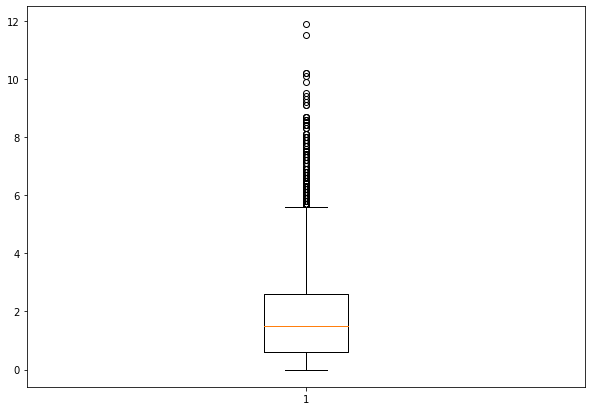

In [56]:
# Outlier in Dataset is just -200

#Creating dataset 
np.random.seed(10) 
data =Data["CO(GT)"]
print(data)
fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(data) 

# show plot 
plt.show() 

In [57]:
from  pandas_visual_analysis import VisualAnalysis
VisualAnalysis(Data)

In [58]:
# Correlation with other variables
Data.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.442803,0.249731,0.670790,0.533061,0.811449,-0.513070,0.723154,0.282080,0.586753,-0.079253,-0.018418,-0.092964
PT08.S1(CO),0.442803,1.000000,0.213250,0.786143,0.922093,0.356291,-0.075630,0.284508,0.823505,0.886880,0.300359,0.417492,0.403123
NMHC(GT),0.249731,0.213250,1.000000,0.198346,0.170037,-0.003611,-0.033366,0.099541,0.196691,0.155224,-0.025205,-0.020121,-0.071580
C6H6(GT),0.670790,0.786143,0.198346,1.000000,0.926265,0.543665,-0.457762,0.402581,0.734014,0.862751,0.275852,0.074847,0.261013
PT08.S2(NMHC),0.533061,0.922093,0.170037,0.926265,1.000000,0.419047,-0.240806,0.334108,0.855763,0.903060,0.400031,0.215377,0.393508
NOx(GT),0.811449,0.356291,-0.003611,0.543665,0.419047,1.000000,-0.514602,0.795888,0.068429,0.553223,-0.268778,0.079334,-0.210622
PT08.S3(NOx),-0.513070,-0.075630,-0.033366,-0.457762,-0.240806,-0.514602,1.000000,-0.440202,-0.002102,-0.352407,0.092534,0.223613,0.068493
NO2(GT),0.723154,0.284508,0.099541,0.402581,0.334108,0.795888,-0.440202,1.000000,0.010185,0.439057,-0.195749,-0.125245,-0.324221
PT08.S4(NO2),0.282080,0.823505,0.196691,0.734014,0.855763,0.068429,-0.002102,0.010185,1.000000,0.694715,0.641916,0.291896,0.719606
PT08.S5(O3),0.586753,0.886880,0.155224,0.862751,0.903060,0.553223,-0.352407,0.439057,0.694715,1.000000,0.149302,0.318989,0.259548


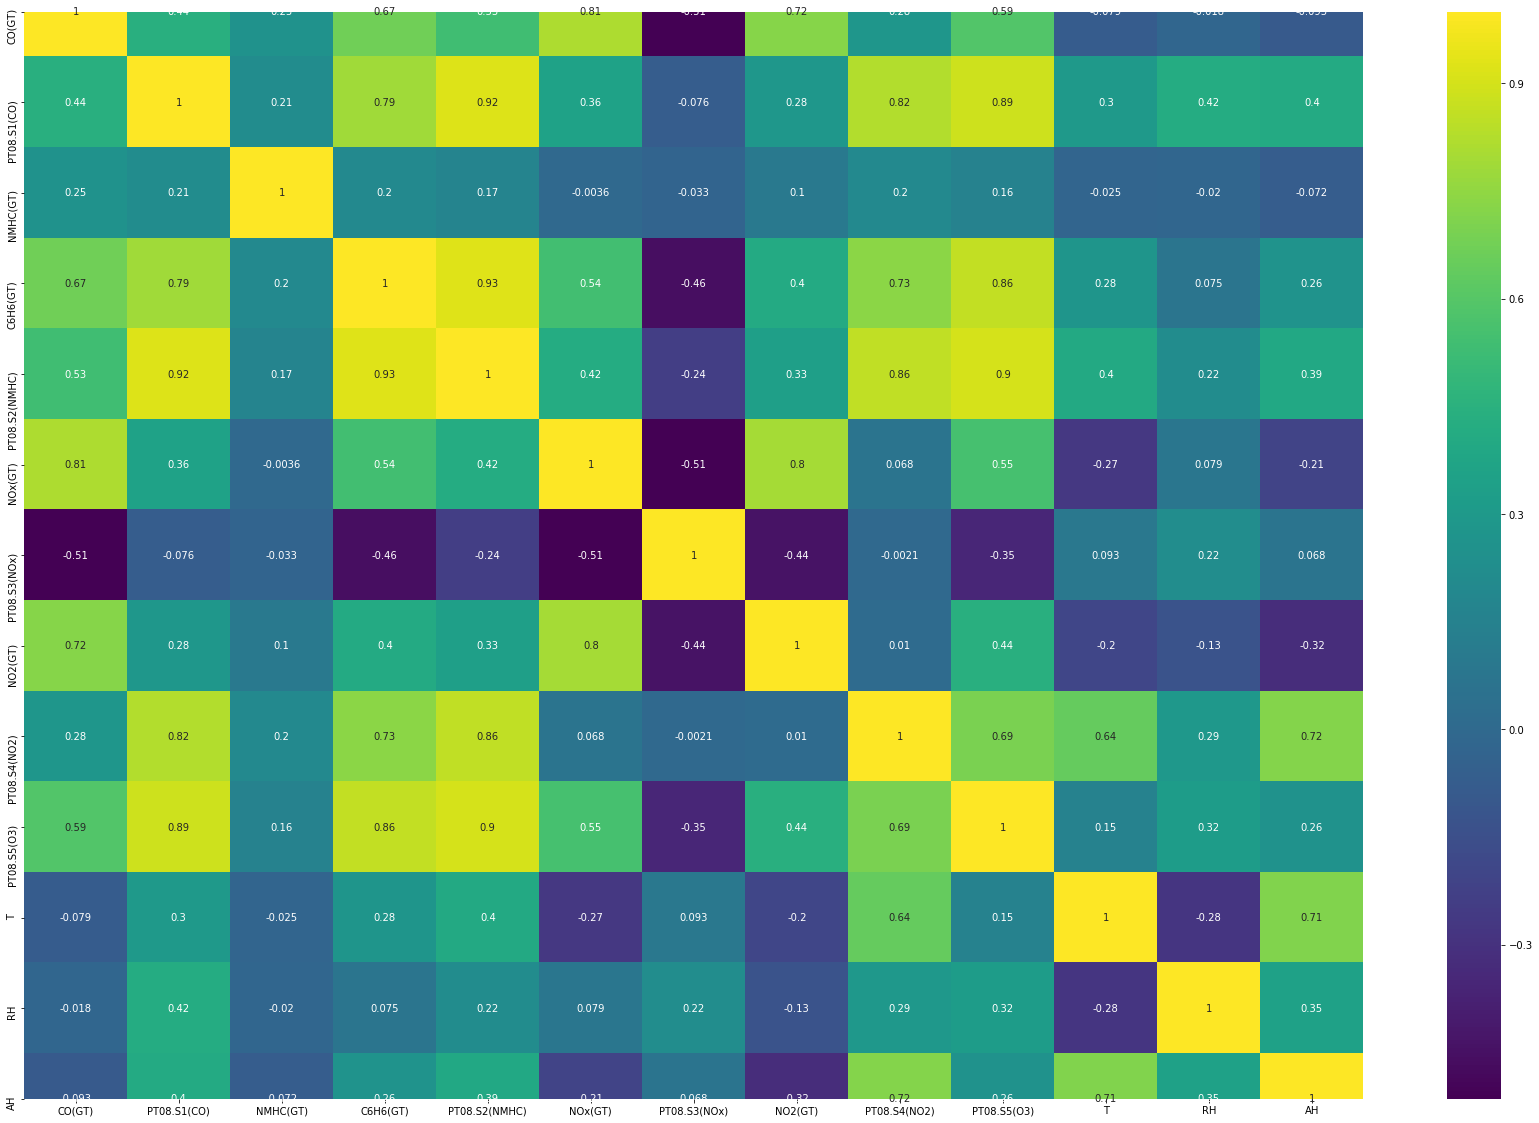

In [59]:
corrmat=Data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(30,20))
# to plot heat map
g=sns.heatmap(Data[top_corr_feature].corr(),annot=True,cmap='viridis')

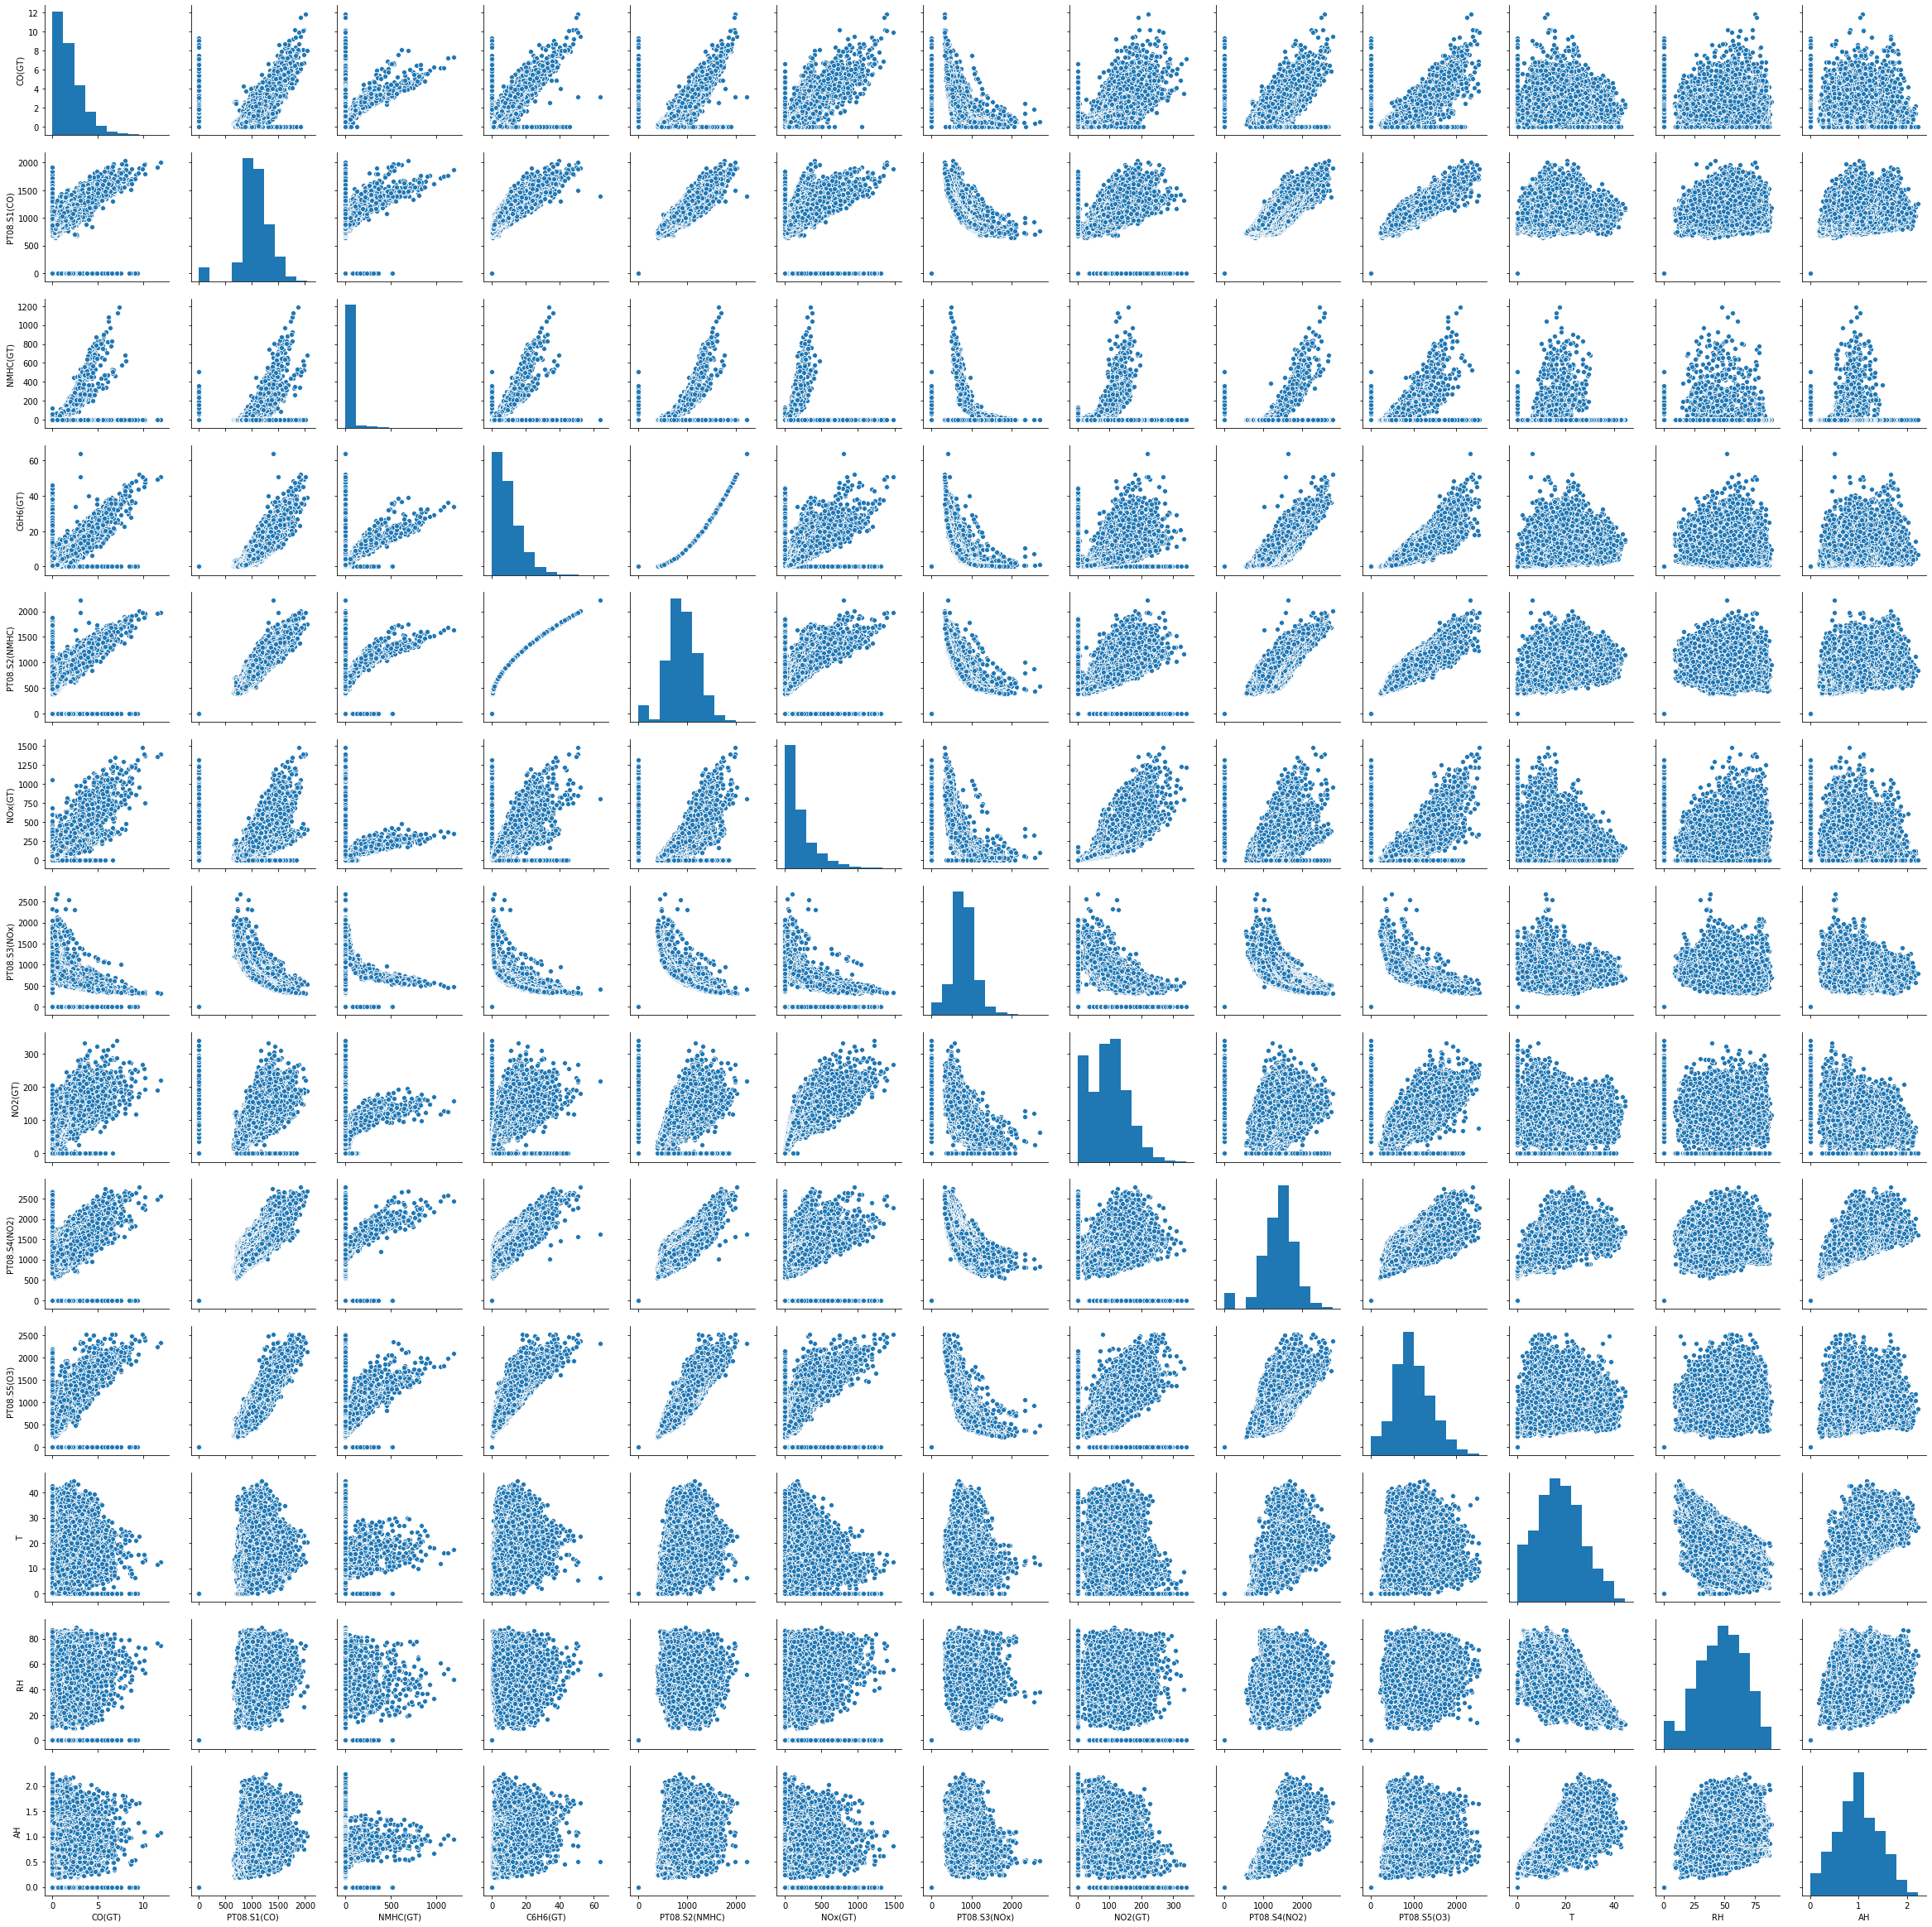

In [60]:
sns.pairplot(Data)

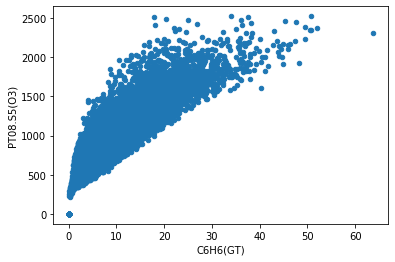

In [61]:
Data.plot(kind='scatter',x='C6H6(GT)',y='PT08.S5(O3)')
plt.show()

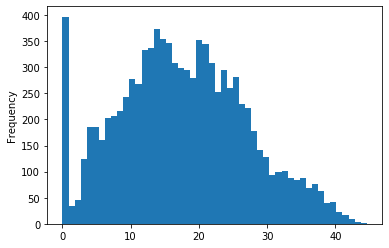

In [62]:
Data["T"].plot.hist(bins=50)

## Conclusion
* **Highest positive corrleation can be seen among T,RH -C6H6 with .97,.92 etc....**

# Prediction

In [63]:
#features
feature=Data
feature=feature.drop('Date',axis=1)
feature=feature.drop('Time',axis=1)
feature=feature.drop('C6H6(GT)',axis=1)

In [64]:
feature.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [65]:
#labels
label = Data['C6H6(GT)']

In [66]:
label.head()

0    11.881723
1     9.397165
2     8.997817
3     9.228796
4     6.518224
Name: C6H6(GT), dtype: float64

In [67]:
#test and train split
X_train,X_test,y_train,y_test = train_test_split(feature,label,test_size=.3)

In [68]:
print(X_train.shape,y_train.shape)

(6549, 12) (6549,)


In [69]:
print(X_test.shape,y_test.shape)

(2808, 12) (2808,)


In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lr.score(X_test,y_test)

0.9596449379820645

In [72]:
y_pred = lr.predict(X_test)
y_pred

array([ 3.25515133, -2.18081087,  1.72019698, ..., 15.34194857,
        8.10425678, 14.59230871])

In [73]:
# The coefficients
print('Coefficients: \n',lr.coef_)

Coefficients: 
 [ 4.65952085e-01 -4.39576539e-03  2.33650622e-04  2.11936801e-02
  5.29258323e-03 -2.88446515e-03 -1.92945612e-02  5.14467447e-03
  2.95704226e-05 -2.67887821e-01 -1.01584380e-01  1.51866143e+00]


In [74]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2.27


In [75]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.96


In [76]:
# the r squared value
print('R squared value: %.2f'%r2_score(y_test, y_pred))

R squared value: 0.96


In [77]:
import pickle

In [81]:
pickle.dump(lr,open("model.pkl","wb"))

In [87]:
import os
import flask
import pickle
from flask import redirect,url_for,request,render_template
Flask=flask

In [92]:
app=flask(lr,template_folder='templates')

TypeError: 'module' object is not callable